Simple Logistic Regression

Import required modules

In [ ]:
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import seaborn as sns

Generate dataset

In [41]:
x,y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

Visualize data


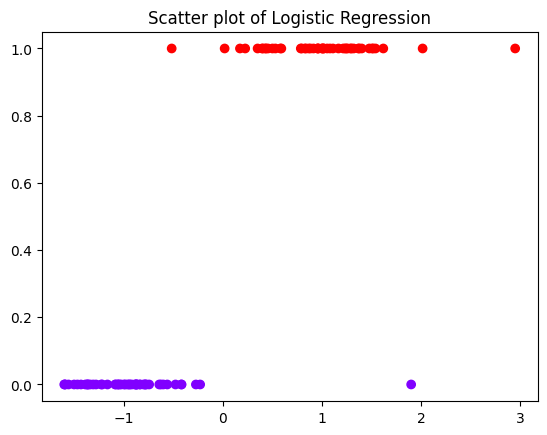

In [ ]:
plt.scatter(x,y,c=y, cmap='rainbow')
plt.title('Scatter plot of Logistic Regression')
plt.xlabel('Feature')
plt.ylabel('Class')
plt.show()

Split dataset

In [43]:
X_train, X_valid, y_train, y_valid = train_test_split(x, y, random_state=1)

X_train.shape

(75, 1)

Perform Logistic Regression using scikit-learn

In [44]:
model=LogisticRegression()


In [45]:
model.fit(X_train,y_train)

LogisticRegression()

In [46]:
print(model.coef_)
print(model.intercept_)

[[2.57253639]]
[0.16296663]


Make prediction using scikit-learn model

In [47]:
y_pred=model.predict(X_valid)

In [48]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1])

In [49]:
y_valid

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1])

Display the Confusion matrix for scikit-learn model

In [50]:
cm= confusion_matrix(y_valid,y_pred)
cm

array([[17,  0],
       [ 0,  8]])

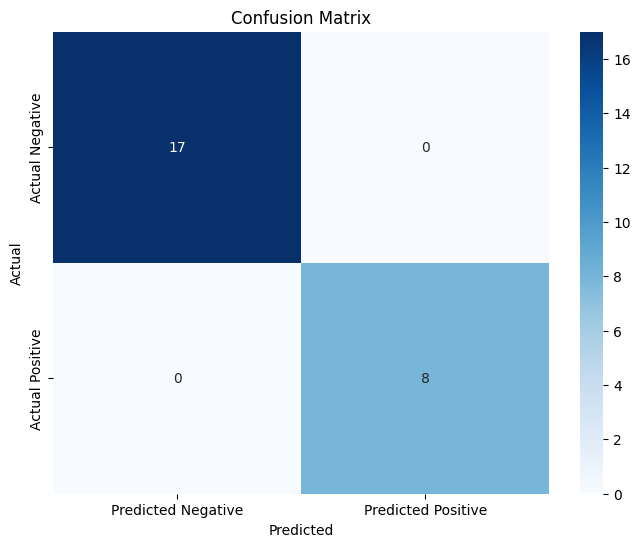

In [51]:
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Custom Logistic Regression implementation

In [62]:
def binary_cross_entropy(y_true, y_pred):
    # Clip values for numerical stability
    epsilon = 1e-15
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return loss

In [63]:
def sigmoid(x):
    """
    Compute the sigmoid of x in a numerically stable way.
    
    Parameters:
        x (np.array): The input array.
    
    Returns:
        np.array: The sigmoid of the input.
    """
    x = np.clip(x, -500, 500)  # Prevent overflow
    return 1 / (1 + np.exp(-x))


In [ ]:
class CustomLogisticRegression():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.loss_history = []  # List to track loss at each iteration

        for i in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            # Compute gradients
            dw = (1 / n_samples) * np.dot(X.T, (predictions - y))
            db = (1 / n_samples) * np.sum(predictions - y)

            # Update weights and bias
            self.weights -= self.lr * dw
            self.bias -= self.lr * db

            # Compute and store loss for tracking
            loss = binary_cross_entropy(y, predictions)
            self.loss_history.append(loss)

            # Optional: Print loss every 100 iterations
            if i % 100 == 0:
                print(f"Iteration {i}: Loss = {loss}")
    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        return (y_pred >= 0.5).astype(int)



In [65]:
clf=CustomLogisticRegression(lr=0.1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_valid)


Iteration 0: Loss = 0.6931471805599454
Iteration 100: Loss = 0.23876887743347439
Iteration 200: Loss = 0.20426157666186429
Iteration 300: Loss = 0.1941127875845446
Iteration 400: Loss = 0.18993183899665964
Iteration 500: Loss = 0.18791913818090886
Iteration 600: Loss = 0.18686019352133854
Iteration 700: Loss = 0.18627066483240604
Iteration 800: Loss = 0.18592962719344144
Iteration 900: Loss = 0.1857268942484379


In [66]:
clf

In [67]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1])

In [68]:
y_valid

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1])

Define an accuracy function

In [69]:
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

acc= accuracy(y_pred, y_valid)
print(acc)

1.0


In [70]:
cm2= confusion_matrix(y_valid,y_pred)
cm2

array([[17,  0],
       [ 0,  8]])

Display the Confusion Matrix for the custom model

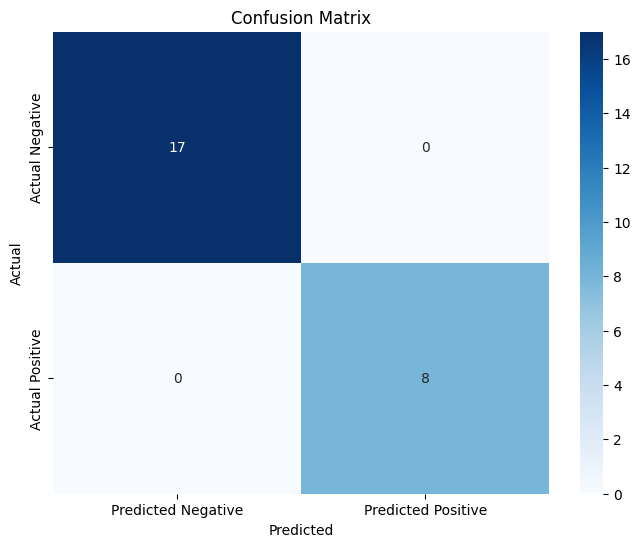

In [71]:
import seaborn as sns

# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm2, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Plot Loss History for the custom logistic regression model

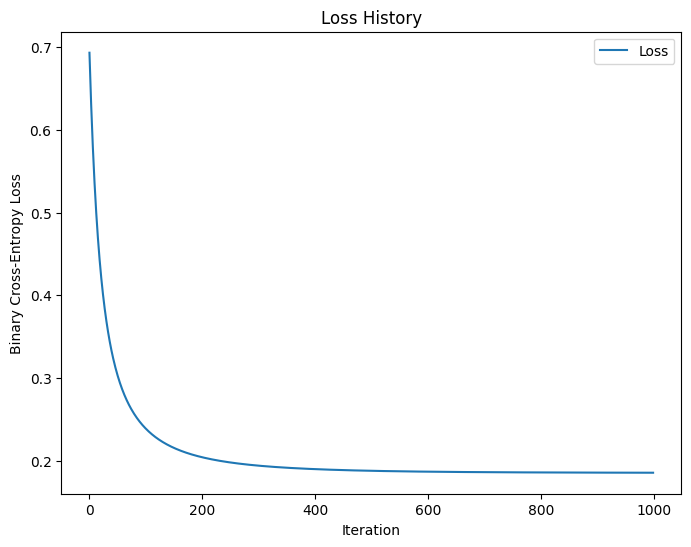

In [72]:
plt.figure(figsize=(8, 6))
plt.plot(clf.loss_history, label="Loss")
plt.xlabel("Iteration")
plt.ylabel("Binary Cross-Entropy Loss")
plt.title("Loss History")
plt.legend()
plt.show()
